In [1]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans

from plot import plot_two_figures, plot_confusion_matrix
from tools import get_number_components, extract_features, remove_unclassified, compute_labels_correspondence

# Loading data & Pre-processing

Loading Indiana and Salinas images and their ground truth

In [2]:
indiana_img = np.load('../data/indianapines.npy')
indiana_labels = np.load('../data/indianapines_gt.npy')
salinas_img = np.load('../data/salinas.npy')
salinas_labels = np.load('../data/salinas_gt.npy')

In [3]:
# normalize radiance values to get reflectance values
indiana_img = indiana_img / indiana_img.max()
salinas_img = salinas_img / salinas_img.max()

In [4]:
print("Indiana shape: {}".format(indiana_img.shape))
print("Salinas shape: {}".format(salinas_img.shape))

Indiana shape: (145, 145, 200)
Salinas shape: (512, 217, 204)


In [5]:
# Reshaping the HSI as a 2D matrix
X_indiana = indiana_img.reshape((-1, indiana_img.shape[-1]))
print("Indiana shape: {}".format(X_indiana.shape))

X_salinas = salinas_img.reshape((-1, salinas_img.shape[-1]))
print("Salinas shape: {}".format(X_salinas.shape))

Indiana shape: (21025, 200)
Salinas shape: (111104, 204)


In [6]:
n_cluster_indiana = len(np.unique(indiana_labels)) - 1
n_cluster_salinas = len(np.unique(salinas_labels)) - 1

In [7]:
print("Number of labels Indiana: {}".format(n_cluster_indiana))
print("Number of labels Salinas: {}".format(n_cluster_salinas))

Number of labels Indiana: 16
Number of labels Salinas: 16


In [8]:
indiana_class_names = np.arange(n_cluster_indiana).astype(str)
salinas_class_names = np.arange(n_cluster_salinas).astype(str)

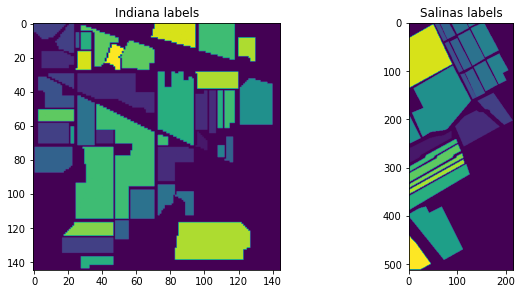

In [9]:
# Display ground truth for each image
plot_two_figures(indiana_labels, salinas_labels, title_fig1='Indiana labels', title_fig2='Salinas labels')

## PCA

PCA stands for principal component analysis. PCA is an unsupervised technique used for reduce the dimensions of the dataset. It transforms the dataset reducing the number of components in order to decrease the computational complexity of the model. 

To reduce the number of component, the PCA computes a linear transformation performing a linear mapping of the data to a lower-dimensional space. It aims to reduce the dimensions with a maximized variance of the data.

In [10]:
n_components_indiana = get_number_components(X_indiana)
n_components_salinas = get_number_components(X_salinas)

Fitting the PCA
Fitting the PCA


In [11]:
print("Number of components Indiana: {}".format(n_components_indiana))
print("Number of components Salinas: {}".format(n_components_salinas))

Number of components Indiana: 69
Number of components Salinas: 6


After retrieving the optimal number of components for each image, we need to compute a second PCA for each image to extract their features.

In [12]:
X_indiana_reduced = extract_features(X_indiana, n_components_indiana)
X_salinas_reduced = extract_features(X_salinas, n_components_salinas)

In [13]:
print("Indiana reduced data shape: {}".format(X_indiana_reduced.shape))
print("Salinas reduced data shape: {}".format(X_salinas_reduced.shape))

Indiana reduced data shape: (21025, 69)
Salinas reduced data shape: (111104, 6)


# Unsupervised models

## KMeans

KMeans is an unsupervised clustering algorithm that attempts to partition the dataset into a specified number of clusters. At the beginning, the algorithm randomly selects centroids for each cluster and performs iterative calculations to optimize the positions of the centroids. The algorithm stops when the centroids have been stabilized.

In [14]:
indiana_model_kmeans = KMeans(n_clusters=n_cluster_indiana, verbose=1)
salinas_model_kmeans = KMeans(n_clusters=n_cluster_salinas, verbose=1)

In [15]:
%%time
indiana_model_kmeans.fit(X_indiana_reduced)

Initialization complete
Iteration 0, inertia 1374.1853197227142
Iteration 1, inertia 982.8673515003721
Iteration 2, inertia 953.5203343195961
Iteration 3, inertia 943.2912425444599
Iteration 4, inertia 936.1696994086468
Iteration 5, inertia 930.3688214668789
Iteration 6, inertia 926.2957773976764
Iteration 7, inertia 923.8397986971656
Iteration 8, inertia 922.4249096509592
Iteration 9, inertia 921.3584911668703
Iteration 10, inertia 920.5215419456244
Iteration 11, inertia 920.0039907053763
Iteration 12, inertia 919.6466762738737
Iteration 13, inertia 919.3606270943286
Iteration 14, inertia 919.1399307022858
Iteration 15, inertia 919.0008521077314
Iteration 16, inertia 918.9218600688847
Iteration 17, inertia 918.8537141143275
Iteration 18, inertia 918.8056259863681
Iteration 19, inertia 918.778364328976
Iteration 20, inertia 918.7583784382892
Iteration 21, inertia 918.7321401336967
Iteration 22, inertia 918.6992631879868
Iteration 23, inertia 918.6693520035865
Iteration 24, inertia 918.

Iteration 10, inertia 928.7043338628879
Iteration 11, inertia 926.9385688174215
Iteration 12, inertia 925.4302958078621
Iteration 13, inertia 924.1208488535341
Iteration 14, inertia 922.8044965012429
Iteration 15, inertia 921.5863490102499
Iteration 16, inertia 920.4569900083004
Iteration 17, inertia 919.4833843424333
Iteration 18, inertia 918.6485838094047
Iteration 19, inertia 918.0280371383149
Iteration 20, inertia 917.5843957431292
Iteration 21, inertia 917.2568378604175
Iteration 22, inertia 917.0364952306646
Iteration 23, inertia 916.8430687739594
Iteration 24, inertia 916.7176548647956
Iteration 25, inertia 916.617403613982
Iteration 26, inertia 916.549565592322
Iteration 27, inertia 916.4965175823071
Iteration 28, inertia 916.4642495347524
Iteration 29, inertia 916.4495852961315
Iteration 30, inertia 916.4373932743224
Iteration 31, inertia 916.425254449124
Iteration 32, inertia 916.4164134887251
Iteration 33, inertia 916.4118193797804
Iteration 34, inertia 916.4092372987052
Ite

Iteration 9, inertia 927.5169950246079
Iteration 10, inertia 926.9090800842225
Iteration 11, inertia 926.4118029295435
Iteration 12, inertia 926.062226501344
Iteration 13, inertia 925.83469109162
Iteration 14, inertia 925.6305184562958
Iteration 15, inertia 925.4667805288791
Iteration 16, inertia 925.3349865658621
Iteration 17, inertia 925.2201413472905
Iteration 18, inertia 925.1119747742723
Iteration 19, inertia 925.0473930925572
Iteration 20, inertia 924.9897932759856
Iteration 21, inertia 924.9337998159277
Iteration 22, inertia 924.8804676336451
Iteration 23, inertia 924.8309534582073
Iteration 24, inertia 924.7892976998746
Iteration 25, inertia 924.7416944223975
Iteration 26, inertia 924.6934464722692
Iteration 27, inertia 924.6534684845406
Iteration 28, inertia 924.6111638105331
Iteration 29, inertia 924.5504200786844
Iteration 30, inertia 924.4837738220341
Iteration 31, inertia 924.4121961460102
Iteration 32, inertia 924.3424262998911
Iteration 33, inertia 924.2743426399463
Iter

KMeans(n_clusters=16, verbose=1)

In [16]:
%%time
salinas_model_kmeans.fit(X_salinas_reduced)

Initialization complete
Iteration 0, inertia 3365.8245183863755
Iteration 1, inertia 2795.8642504220725
Iteration 2, inertia 2753.441812009608
Iteration 3, inertia 2725.6106825233005
Iteration 4, inertia 2694.1366136729457
Iteration 5, inertia 2661.7525789661167
Iteration 6, inertia 2638.067820073553
Iteration 7, inertia 2623.2204678780713
Iteration 8, inertia 2613.8471224809477
Iteration 9, inertia 2606.5687458196217
Iteration 10, inertia 2600.418901848087
Iteration 11, inertia 2594.9026252071835
Iteration 12, inertia 2589.5941040554953
Iteration 13, inertia 2584.7368142481664
Iteration 14, inertia 2579.94424457375
Iteration 15, inertia 2575.4716141805934
Iteration 16, inertia 2571.4568333863567
Iteration 17, inertia 2568.3406806819194
Iteration 18, inertia 2565.441165040196
Iteration 19, inertia 2562.6189693411457
Iteration 20, inertia 2559.7974013075727
Iteration 21, inertia 2556.499120255876
Iteration 22, inertia 2553.837783332159
Iteration 23, inertia 2552.0620976471864
Iteration 

Iteration 29, inertia 2503.3376321841674
Iteration 30, inertia 2503.12689645214
Converged at iteration 30: center shift 6.715168273834772e-06 within tolerance 1.126032394019285e-05.
Initialization complete
Iteration 0, inertia 3711.7708573093646
Iteration 1, inertia 2784.283208262021
Iteration 2, inertia 2698.097395579262
Iteration 3, inertia 2673.9067508985518
Iteration 4, inertia 2661.7590035476587
Iteration 5, inertia 2653.9923332248404
Iteration 6, inertia 2648.3397738137523
Iteration 7, inertia 2643.8695034493403
Iteration 8, inertia 2640.4217484479927
Iteration 9, inertia 2637.5969411705405
Iteration 10, inertia 2635.1094344538087
Iteration 11, inertia 2632.864812965114
Iteration 12, inertia 2630.817327243013
Iteration 13, inertia 2628.625178797903
Iteration 14, inertia 2626.2607975305414
Iteration 15, inertia 2623.6564518177847
Iteration 16, inertia 2620.7451674103672
Iteration 17, inertia 2617.8456105338782
Iteration 18, inertia 2615.0396370094286
Iteration 19, inertia 2612.460

KMeans(n_clusters=16, verbose=1)

In [17]:
indiana_preds_kmeans = indiana_model_kmeans.labels_.reshape((indiana_img.shape[0], indiana_img.shape[1]))
salinas_preds_kmeans = salinas_model_kmeans.labels_.reshape((salinas_img.shape[0], salinas_img.shape[1]))

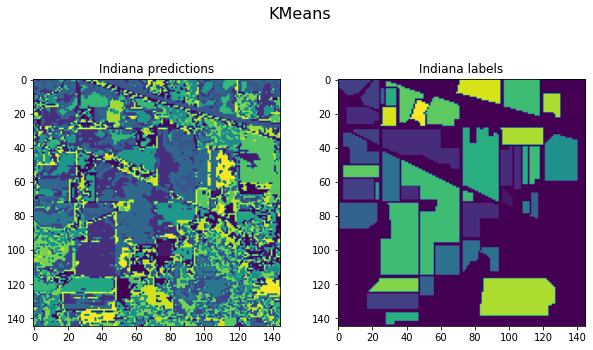

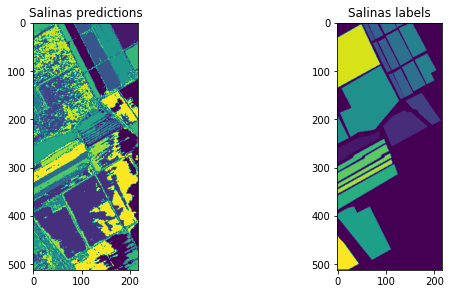

In [18]:
plot_two_figures(indiana_preds_kmeans, indiana_labels, title_fig1='Indiana predictions', title_fig2='Indiana labels', suptitle='KMeans')
plot_two_figures(salinas_preds_kmeans, salinas_labels, title_fig1='Salinas predictions', title_fig2='Salinas labels')

As we can see, our model is able to classify some data but we cannot clearly distinguish the classes. For example, on the lower part of the image of the salinas predictions, we can assume that most of the data belongs to the same class but with the ground truth image, the lower right part of the image does not belong to no class.

We will remove some unclassified data in order to easily distinguish what our model recognized.

In [19]:
indiana_preds_kmeans_corrected = remove_unclassified(indiana_preds_kmeans, indiana_labels)
salinas_preds_kmeans_corrected = remove_unclassified(salinas_preds_kmeans, salinas_labels)

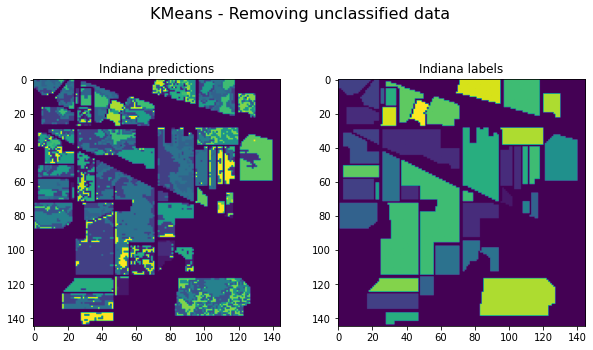

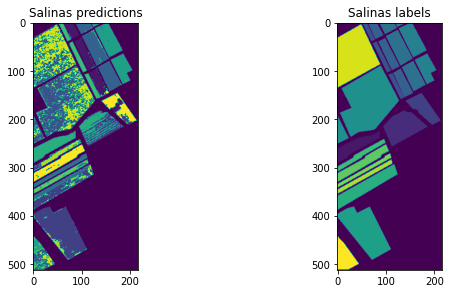

In [20]:
plot_two_figures(indiana_preds_kmeans_corrected, indiana_labels, title_fig1='Indiana predictions', title_fig2='Indiana labels', suptitle='KMeans - Removing unclassified data')
plot_two_figures(salinas_preds_kmeans_corrected, salinas_labels, title_fig1='Salinas predictions', title_fig2='Salinas labels')

In [21]:
indiana_labels_cpy, indiana_kmeans_final_preds = compute_labels_correspondence(indiana_labels, indiana_preds_kmeans_corrected, n_cluster_indiana)
salinas_labels_cpy, salinas_kmeans_final_preds = compute_labels_correspondence(salinas_labels, salinas_preds_kmeans_corrected, n_cluster_salinas)

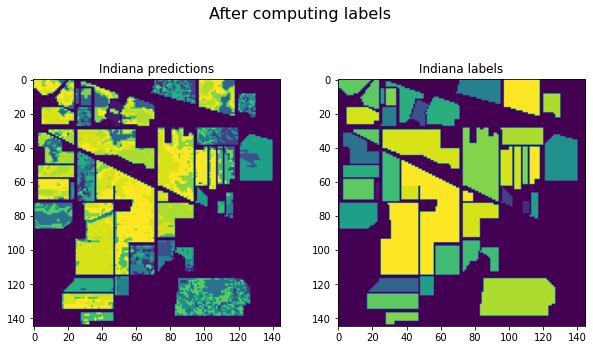

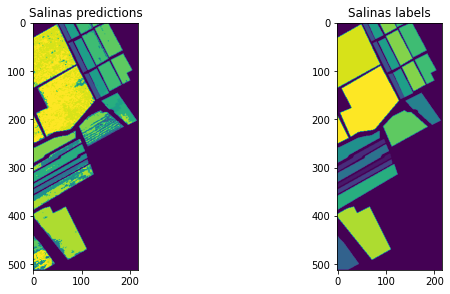

In [22]:
plot_two_figures(indiana_kmeans_final_preds, indiana_labels_cpy, 'Indiana predictions', 'Indiana labels', suptitle='After computing labels')
plot_two_figures(salinas_kmeans_final_preds, salinas_labels_cpy, 'Salinas predictions', 'Salinas labels')

We can now distinguish the classes more easily. Our predictions on the salinas image seem correct except for the upper left part.

On Indiana image, it is still difficult to distinguish the classes. For example, our model is not able to recognize the block at the bottom right of the image.

After computing labels correspondence, if we only look at the colors, classification seems correct.
To verify it, we can display confusion matrix before and after computing labels correspondence.

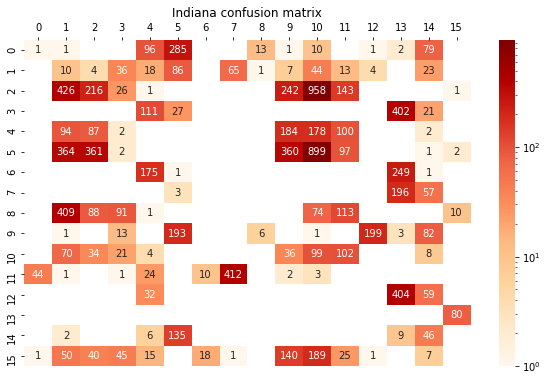

In [23]:
plot_confusion_matrix(indiana_preds_kmeans_corrected[indiana_preds_kmeans_corrected != 0], indiana_labels[indiana_labels != 0], class_names=indiana_class_names, log=True, title='Indiana confusion matrix')

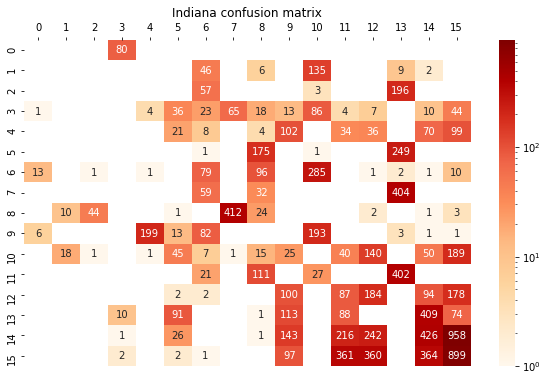

In [24]:
plot_confusion_matrix(indiana_kmeans_final_preds[indiana_kmeans_final_preds != 0], indiana_labels_cpy[indiana_labels_cpy != 0], class_names=indiana_class_names, log=True, title='Indiana confusion matrix')

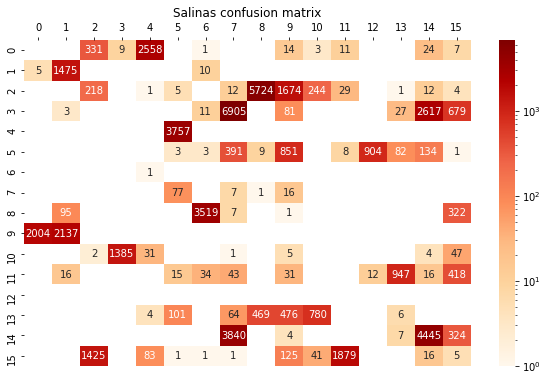

In [25]:
plot_confusion_matrix(salinas_preds_kmeans_corrected[salinas_preds_kmeans_corrected != 0], salinas_labels[salinas_labels != 0], class_names=salinas_class_names, log=True, title='Salinas confusion matrix')

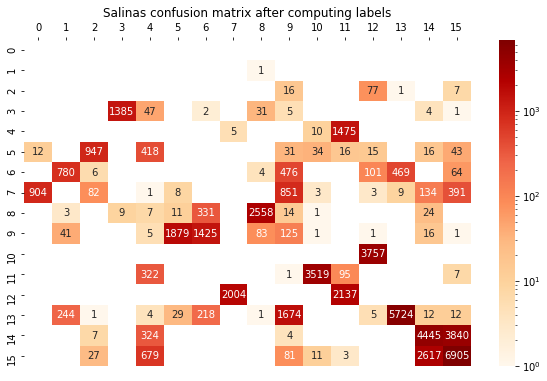

In [26]:
plot_confusion_matrix(salinas_kmeans_final_preds[salinas_kmeans_final_preds != 0], salinas_labels_cpy[salinas_labels_cpy != 0], class_names=salinas_class_names, log=True, title='Salinas confusion matrix after computing labels')

Our confusion matrices seem to be better after correspondence but we are not able to clearly distinguish the diagonal of the matrix

## Mini Batch KMeans

Mini Batch KMeans is a variant of the KMeans algorithm that converges faster. The main difference between those algorithms is that Mini Batch KMeans uses small batches to reduce the computation time. For each interation, a new random samples from the dataset is obtained and used to update the clusters. 

In [27]:
indiana_model_mini = MiniBatchKMeans(n_clusters=n_cluster_indiana, verbose=1)
salinas_model_mini = MiniBatchKMeans(n_clusters=n_cluster_salinas, verbose=1)

In [28]:
%%time
indiana_model_mini.fit(X_indiana_reduced)

Init 1/3 with method: k-means++
Inertia for init 1/3: 13.496756
Init 2/3 with method: k-means++
Inertia for init 2/3: 13.094054
Init 3/3 with method: k-means++
Inertia for init 3/3: 15.241952
Minibatch iteration 1/21100: mean batch inertia: 0.053992, ewa inertia: 0.053992 
Minibatch iteration 2/21100: mean batch inertia: 0.044662, ewa inertia: 0.053903 
Minibatch iteration 3/21100: mean batch inertia: 0.045597, ewa inertia: 0.053824 
Minibatch iteration 4/21100: mean batch inertia: 0.046359, ewa inertia: 0.053753 
Minibatch iteration 5/21100: mean batch inertia: 0.045127, ewa inertia: 0.053671 
Minibatch iteration 6/21100: mean batch inertia: 0.046029, ewa inertia: 0.053598 
Minibatch iteration 7/21100: mean batch inertia: 0.043888, ewa inertia: 0.053506 
Minibatch iteration 8/21100: mean batch inertia: 0.046168, ewa inertia: 0.053436 
Minibatch iteration 9/21100: mean batch inertia: 0.044107, ewa inertia: 0.053347 
Minibatch iteration 10/21100: mean batch inertia: 0.044588, ewa inerti

Minibatch iteration 179/21100: mean batch inertia: 0.040395, ewa inertia: 0.045272 
Minibatch iteration 180/21100: mean batch inertia: 0.042379, ewa inertia: 0.045245 
Minibatch iteration 181/21100: mean batch inertia: 0.043869, ewa inertia: 0.045232 
Minibatch iteration 182/21100: mean batch inertia: 0.044910, ewa inertia: 0.045229 
Minibatch iteration 183/21100: mean batch inertia: 0.042507, ewa inertia: 0.045203 
Minibatch iteration 184/21100: mean batch inertia: 0.046131, ewa inertia: 0.045211 
Minibatch iteration 185/21100: mean batch inertia: 0.041294, ewa inertia: 0.045174 
Minibatch iteration 186/21100: mean batch inertia: 0.049505, ewa inertia: 0.045215 
Minibatch iteration 187/21100: mean batch inertia: 0.045784, ewa inertia: 0.045221 
Minibatch iteration 188/21100: mean batch inertia: 0.046538, ewa inertia: 0.045233 
Minibatch iteration 189/21100: mean batch inertia: 0.053488, ewa inertia: 0.045312 
Minibatch iteration 190/21100: mean batch inertia: 0.037170, ewa inertia: 0.

MiniBatchKMeans(n_clusters=16, verbose=1)

In [29]:
%%time
salinas_model_mini.fit(X_salinas_reduced)

Init 1/3 with method: k-means++
Inertia for init 1/3: 5.894622
Init 2/3 with method: k-means++
Inertia for init 2/3: 5.730150
Init 3/3 with method: k-means++
Inertia for init 3/3: 5.577662
Minibatch iteration 1/111200: mean batch inertia: 0.024299, ewa inertia: 0.024299 
Minibatch iteration 2/111200: mean batch inertia: 0.024911, ewa inertia: 0.024300 
Minibatch iteration 3/111200: mean batch inertia: 0.025589, ewa inertia: 0.024302 
Minibatch iteration 4/111200: mean batch inertia: 0.020134, ewa inertia: 0.024295 
Minibatch iteration 5/111200: mean batch inertia: 0.017718, ewa inertia: 0.024283 
Minibatch iteration 6/111200: mean batch inertia: 0.018417, ewa inertia: 0.024272 
Minibatch iteration 7/111200: mean batch inertia: 0.087828, ewa inertia: 0.024387 
Minibatch iteration 8/111200: mean batch inertia: 0.025237, ewa inertia: 0.024388 
Minibatch iteration 9/111200: mean batch inertia: 0.024729, ewa inertia: 0.024389 
Minibatch iteration 10/111200: mean batch inertia: 0.023264, ewa

MiniBatchKMeans(n_clusters=16, verbose=1)

In [30]:
indiana_preds_mini = indiana_model_mini.labels_.reshape((indiana_img.shape[0], indiana_img.shape[1]))
salinas_preds_mini = salinas_model_mini.labels_.reshape((salinas_img.shape[0], salinas_img.shape[1]))

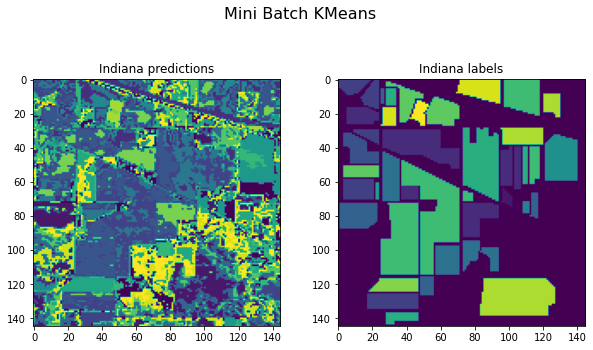

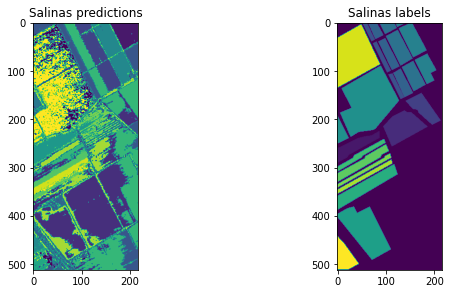

In [31]:
plot_two_figures(indiana_preds_mini, indiana_labels, title_fig1='Indiana predictions', title_fig2='Indiana labels', suptitle='Mini Batch KMeans')
plot_two_figures(salinas_preds_mini, salinas_labels, title_fig1='Salinas predictions', title_fig2='Salinas labels')

In [32]:
indiana_preds_mini_corrected = remove_unclassified(indiana_preds_mini, indiana_labels)
salinas_preds_mini_corrected = remove_unclassified(salinas_preds_mini, salinas_labels)

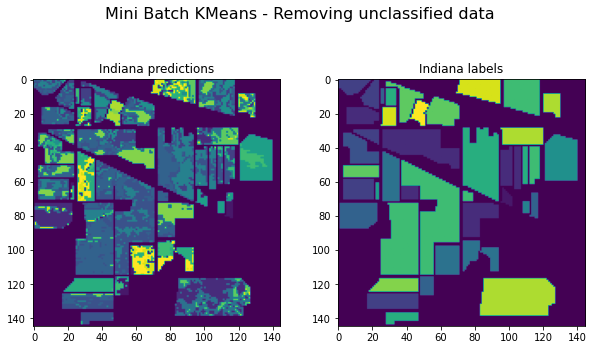

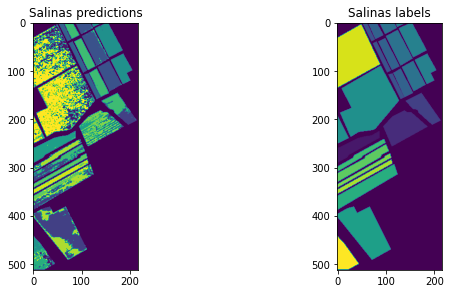

In [33]:
plot_two_figures(indiana_preds_mini_corrected, indiana_labels, title_fig1='Indiana predictions', title_fig2='Indiana labels', suptitle='Mini Batch KMeans - Removing unclassified data')
plot_two_figures(salinas_preds_mini_corrected, salinas_labels, title_fig1='Salinas predictions', title_fig2='Salinas labels')

It seems that it is still difficult to clearly distinguish the classes on the two images. 
We do not see any improvement on the upper left part of the predictions on salinas image and on the indiana image.

In [34]:
indiana_labels_cpy, indiana_mini_final_preds = compute_labels_correspondence(indiana_labels, indiana_preds_mini_corrected, n_cluster_indiana)
salinas_labels_cpy, salinas_mini_final_preds = compute_labels_correspondence(salinas_labels, salinas_preds_mini_corrected, n_cluster_salinas)

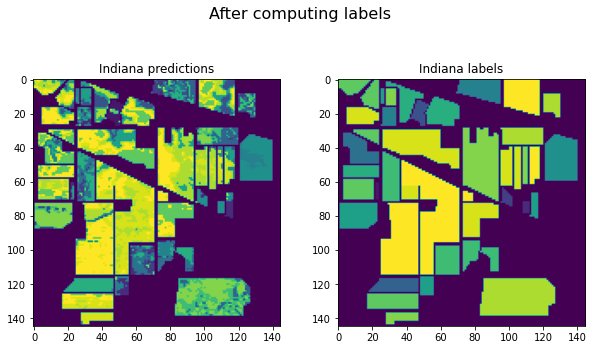

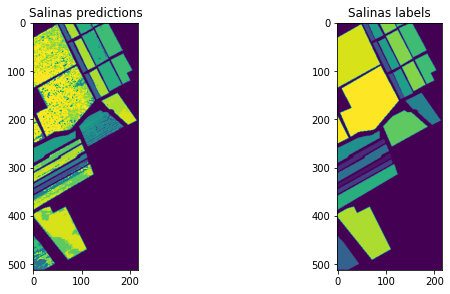

In [35]:
plot_two_figures(indiana_mini_final_preds, indiana_labels_cpy, 'Indiana predictions', 'Indiana labels', suptitle='After computing labels')
plot_two_figures(salinas_mini_final_preds, salinas_labels_cpy, 'Salinas predictions', 'Salinas labels')

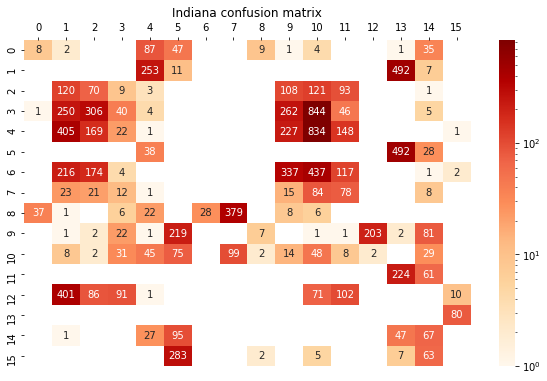

In [36]:
plot_confusion_matrix(indiana_preds_mini_corrected[indiana_preds_mini_corrected != 0], indiana_labels[indiana_labels != 0], class_names=indiana_class_names, log=True, title='Indiana confusion matrix')

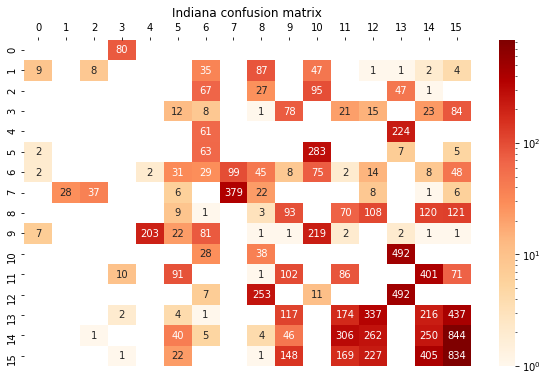

In [37]:
plot_confusion_matrix(indiana_mini_final_preds[indiana_mini_final_preds != 0], indiana_labels_cpy[indiana_labels_cpy != 0], class_names=indiana_class_names, log=True, title='Indiana confusion matrix')

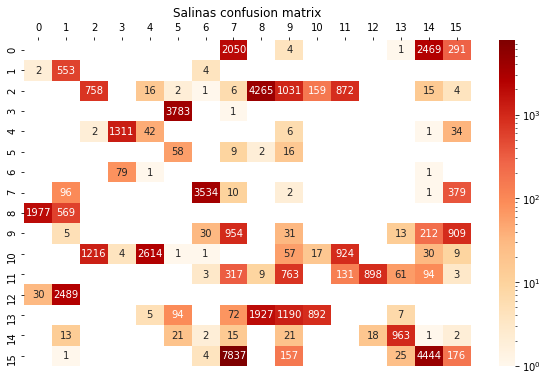

In [38]:
plot_confusion_matrix(salinas_preds_mini_corrected[salinas_preds_mini_corrected != 0], salinas_labels[salinas_labels != 0], class_names=salinas_class_names, log=True, title='Salinas confusion matrix')

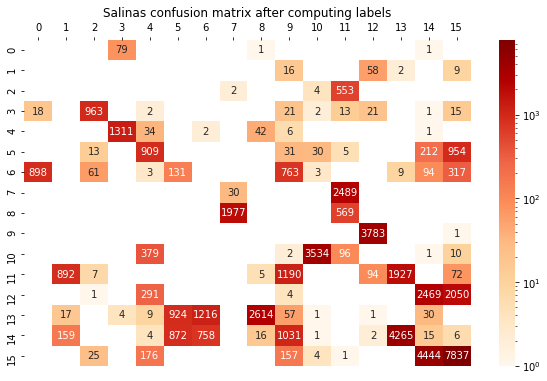

In [39]:
plot_confusion_matrix(salinas_mini_final_preds[salinas_mini_final_preds != 0], salinas_labels_cpy[salinas_labels_cpy != 0], class_names=salinas_class_names, log=True, title='Salinas confusion matrix after computing labels')

Like KMeans models, it is still difficult to see the diagonal of the matrix well. These models are not good enough to perform classification.

## Save predictions

In order to be able to compare these two models with the others, we save our prediction data on each image.

In [40]:
np.save('../data/predictions/indiana_preds_kmeans.npy', indiana_preds_kmeans_corrected)
np.save('../data/predictions/salinas_preds_kmeans.npy', salinas_preds_kmeans_corrected)

In [41]:
np.save('../data/predictions/indiana_preds_minibatch.npy', indiana_preds_mini_corrected)
np.save('../data/predictions/salinas_preds_minibatch.npy', salinas_preds_mini_corrected)